### Classification of Abalones Data
<b>Goal: Predicting age of abalones</b><br>
Input variables: Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings<br><br>
•	Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so I created a numeric feature: 1:Male, 2: Female, 3:Infant	<br>
•	There are no missing/null values in dataset. At 2 places height is 0mm , but considering it in mm we can ignore it considering 4000 rows<br>
•	Added age column in the dataframe for classification. Age is classified based on the number of rings.<br><br>
Rings 1-8 -->Age 1, denoting young<br>
Rings 9-10 -->Age 2, denoting middle<br>
Rings 11-29 -->Age 3, denoting old<br>
 

### Loading abalone data in pandas datframe

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
# from sklearn.utils import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets

data_directory = os.path.join('.', 'Data')

abalone_data_path = os.path.join(data_directory, 'abalone.csv')
abalone = pd.read_csv(abalone_data_path, low_memory=False, encoding='latin-1') 

### The original data did not have headers in it. Adding headers to the dataframe

In [2]:
file = open("abalone.data", "r") 
df = pd.read_table(file,sep=',',names = ["Sex", "Length", "Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"])

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


###  Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so I created a numeric feature: 1:Male, 2: Female, 3:Infant

In [3]:
sex_dictionary = {'M': 1, 'F' : 2,'I':3}
df['Sex'] = df['Sex'].apply(lambda x: sex_dictionary[x])

### Finding datatype of all the variables

In [4]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

### Finding the shape of dataframe

In [5]:
print(df.shape)
print(df.columns)
#print(loan.describe())

(4177, 9)
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


### Getting summary metrics for the dataframe

In [6]:
print(df.describe())

               Sex       Length     Diameter       Height  Whole weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      1.955470     0.523992     0.407881     0.139516      0.828742   
std       0.827815     0.120093     0.099240     0.041827      0.490389   
min       1.000000     0.075000     0.055000     0.000000      0.002000   
25%       1.000000     0.450000     0.350000     0.115000      0.441500   
50%       2.000000     0.545000     0.425000     0.140000      0.799500   
75%       3.000000     0.615000     0.480000     0.165000      1.153000   
max       3.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked weight  Viscera weight  Shell weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     

### Checking for missing/null values. 

In [7]:
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Adding age column in the dataframe for classification. Age is classified based on the number of rings.
### Rings 1-8 -->Age 1, denoting young
###  Rings 9-10 -->Age 2, denoting middle
### Rings 11-29 -->Age 3, denoting old

In [8]:
def label_race (row):
   if row['Rings']>=1 and row['Rings']<=8:
      return 1
   elif row['Rings'] >=9 and row['Rings']<=10:
      return 2
   elif row['Rings']>=11 and row['Rings']<=29:
      return 3
   return 0

In [9]:
df['Age'] = df.apply(lambda _: '', axis=1)

In [10]:
df['Age']=df.apply (lambda row: label_race (row),axis=1)

In [11]:
df.Sex = df.Sex.astype(float)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [12]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,3.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,3.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


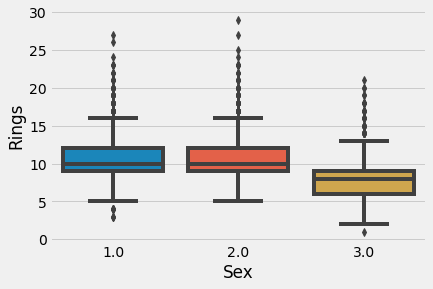

In [13]:
ax = sns.boxplot(x="Sex", y="Rings", data=df)
plt.show()

### Infants have lower number of rings as compared to males and females

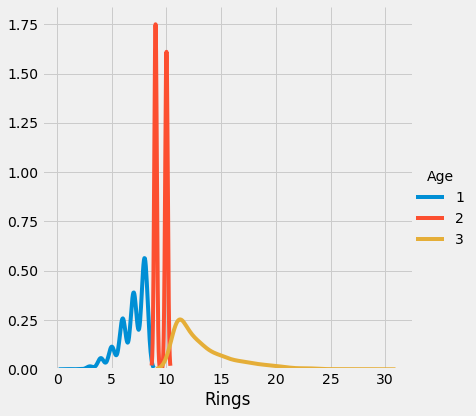

In [14]:
sns.FacetGrid(df, hue="Age", height=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()
plt.show()

### Age labelled 1 are youth, label 2 are middle aged and 3 are old aged. Young abalones have 0-10 rings, Middle aged abalones have 9-11 rings and old abalones have more than 10 rings

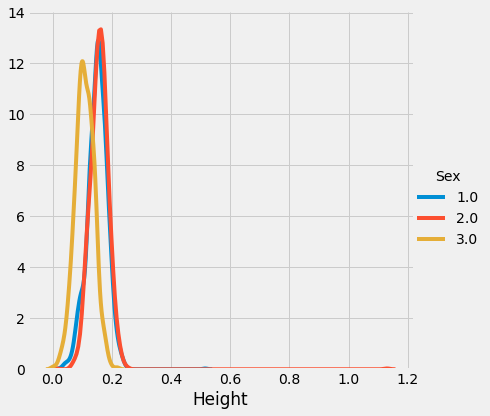

In [15]:
sns.FacetGrid(df, hue="Sex", height=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()
plt.show()

### Female abalones have more height than males and infants. Height of infants is between 0 to 0.3mm

### Classification

### Response variable is age

In [16]:
Y = df[['Age']]
Y 

,Age
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


### Predictor variables obtained by dropping rings and age from the dataframe 

In [17]:

X=df.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,3.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


<Figure size 432x288 with 0 Axes>

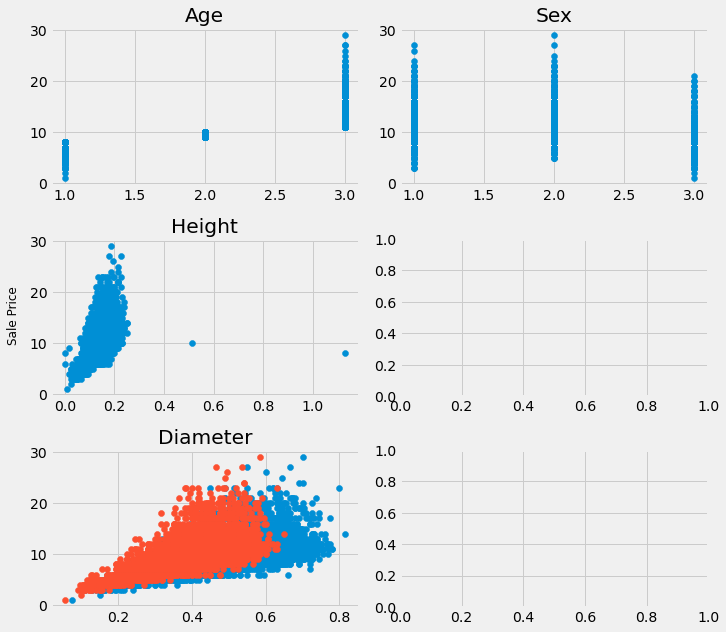

In [19]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
ring = df.Rings.values
axarr[0, 0].scatter(df.Age.values, ring)
axarr[0, 0].set_title('Age')
axarr[0, 1].scatter(df.Sex.values, ring)
axarr[0, 1].set_title('Sex')
axarr[1, 0].scatter(df.Height.values, ring)
axarr[1, 0].set_title('Height')
axarr[2, 0].scatter(df.Length.values, ring)
axarr[2, 0].set_title('Length')
axarr[2, 0].scatter(df.Diameter.values, ring)
axarr[2, 0].set_title('Diameter')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

### Height of abalones is in the range of 0 to 0.2mm, most abalones are old aged.

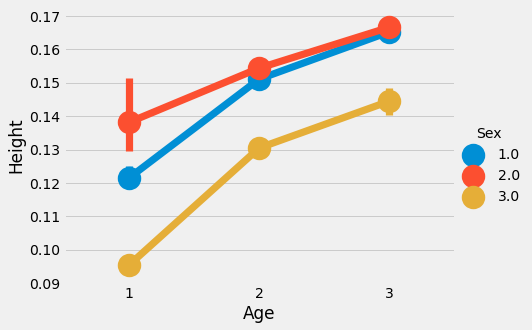

In [20]:
sns.factorplot('Age', 'Height', hue = 'Sex', estimator = np.mean, data = df, 
             height = 4.5, aspect = 1.4)
plt.show()

### Female abalones have largest height. Male abalones have height ranging from 0.12 to 0.15mm. 

### Dividing the dataset into 75% training and 25% test data using train_test_split

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y) # splits 75%/25% by default

### Shape of training and testing data

In [22]:
print("train_df_x:")
print(train_X.shape)

print("train_df_y:")
print(train_y.shape)

print("test_df_x:")
print(test_X.shape)

print("test_df_y:")
print(test_y.shape)

train_df_x:
(3132, 8)
train_df_y:
(3132, 1)
test_df_x:
(1045, 8)
test_df_y:
(1045, 1)


In [23]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0

### 1. Logistic Regression

In [24]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

#logistic regression
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
log_reg.fit(train_X, train_y)
print ("Intercept is ",log_reg.intercept_)
print("Coefficient is ",log_reg.coef_)
y_pred=log_reg.predict(test_X) 

Intercept is  [ 2.40335233 -1.11799473 -1.2853576 ]
Coefficient is  [[ 0.32124865 -1.49401676 -2.12959015 -1.21855469 -2.32948694  4.62639788
  -0.76424173 -4.72000064]
 [-0.12035329  1.88778634  1.30692472  0.07771084 -0.65841239  1.2518891
   1.33741209 -0.47044017]
 [-0.20089536 -0.39376958  0.82266542  1.14084385  2.98789933 -5.87828698
  -0.57317035  5.19044082]]


In [25]:

#calculate Confusion Matrix
print("Confusion Matrix: ")
confusion_matrix(test_y, y_pred)

Confusion Matrix: 


array([[256,  73,  14],
       [ 84, 156, 108],
       [ 32,  57, 265]], dtype=int64)

In [26]:
print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, y_pred)*100)


Accuracy of Logistic Regression is:
64.7846889952153


In [27]:

#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))


MAE:0.39617224880382773


In [28]:

#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))


RMSE:0.6958523739384593


In [29]:

print("Classification report for Test data %s:\n%s\n\n"
     % (log_reg, metrics.classification_report(test_y, y_pred)))
    

Classification report for Test data LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           1       0.69      0.75      0.72       343
           2       0.55      0.45      0.49       348
           3       0.68      0.75      0.72       354

    accuracy                           0.65      1045
   macro avg       0.64      0.65      0.64      1045
weighted avg       0.64      0.65      0.64      1045





In [30]:
def confusion_matrix_data(conf_matrix):
    fix, ax = plt.subplots(figsize=(16, 12))
    plt.suptitle('Confusion Matrix  on Data Set')
    for ii, values in conf_matrix.items():
        matrix = values['matrix']
        title = values['title']
        plt.subplot(2, 2, ii) # starts from 1
        plt.title(title);
        sns.heatmap(matrix, annot=True,  fmt='');

### 2. Neural Networks

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#neural network
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
neural_network_class.fit(train_X,train_y)
predictions = neural_network_class.predict(test_X)
y_pred=predictions

#calculate ROC curve
#preds = neural_network_class.predict_proba(test_X)[:,1]
#calculate_roc_curve(test_y, y_pred,3)


#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

Confusion Matrix


array([[257,  66,  20],
       [ 56, 190, 102],
       [ 14,  69, 271]], dtype=int64)

In [32]:
print("Accuracy of Neural Networks is")
print(accuracy_score(test_y, y_pred)*100)

Accuracy of Neural Networks is
68.70813397129186


In [33]:

#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))


MAE:0.34545454545454546


In [34]:
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

RMSE:0.6407232755171874


In [35]:
print("Classification report for Test data %s:\n%s\n\n"
     % (scaler, metrics.classification_report(test_y, y_pred)))

Classification report for Test data StandardScaler(copy=True, with_mean=True, with_std=True):
              precision    recall  f1-score   support

           1       0.79      0.75      0.77       343
           2       0.58      0.55      0.56       348
           3       0.69      0.77      0.73       354

    accuracy                           0.69      1045
   macro avg       0.69      0.69      0.69      1045
weighted avg       0.69      0.69      0.69      1045





### 3. Random Forest

In [36]:
from sklearn.metrics import confusion_matrix
#Random Forest
rf = RandomForestClassifier(n_jobs=2)
rf.fit(train_X, train_y)
preds = rf.predict_proba(test_X)[:,1]
y_pred=rf.predict(test_X)
#calculate ROC curve
#calculate_roc_curve(y_test, y_pred,2) 


#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)


Confusion Matrix


array([[256,  70,  17],
       [ 74, 176,  98],
       [ 22,  82, 250]], dtype=int64)

In [37]:

print("Accuracy of Random Forest is:")
print(accuracy_score(test_y, y_pred)*100)


Accuracy of Random Forest is:
65.26315789473685


In [38]:

#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))


MAE:0.384688995215311


In [39]:
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse)) 

RMSE:0.6777389936698861


In [40]:

print("Classification report for Test data %s:\n%s\n\n"
     % (rf, metrics.classification_report(test_y, y_pred)))

Classification report for Test data RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           1       0.73      0.75      0.74       343
           2       0.54      0.51      0.52       348
           3       0.68      0.71      0.70       354

    accuracy                           0.65      1045
   macro avg       0.65      0.65      0.65      1045
weighted avg       0.65      0.65      0.65      1045





### 4.  KNN Classifier

In [41]:
# Create an instance of KNeighborsClassifier and then fit training data
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(train_X,train_y)
# Make class predictions for all observations in X
y_pred = clf.predict(test_X)

#calculate Confusion Matrix
print("Confusion Matrix")
confusion_matrix(test_y, y_pred)

Confusion Matrix


array([[260,  70,  13],
       [ 85, 178,  85],
       [ 29, 120, 205]], dtype=int64)

In [42]:

print("Accuracy of KNN Classifier is:")
print(accuracy_score(test_y, y_pred)*100)

#Mean Absolute Error 

mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

Accuracy of KNN Classifier is:
61.5311004784689
MAE:0.42488038277511964


In [43]:
#RMSE 
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

RMSE:0.7108186533109109


In [44]:

print("Classification report for Test data %s:\n%s\n\n"
     % (clf, metrics.classification_report(test_y, y_pred)))

Classification report for Test data KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           1       0.70      0.76      0.73       343
           2       0.48      0.51      0.50       348
           3       0.68      0.58      0.62       354

    accuracy                           0.62      1045
   macro avg       0.62      0.62      0.62      1045
weighted avg       0.62      0.62      0.62      1045





### Models

### 1. NEURAL NETWORK<br>Accuracy : 68.7081339712<br>Root mean square error(RMSE): 0.6407232755171874<br>Mean Absolute error(MAE): 0.34545454545454546

### 2. Logistic Regression	<br>Accuracy : 64.7846889952<br>Root mean square error(RMSE):	0.6958523739384593<br>Mean Absolute error(MAE): 0.39617224880382773

### 3. Random Forest	<br>Accuracy : 65.2631578947<br>Root mean square error(RMSE):	0.6777389936698861<br>Mean Absolute error(MAE):	0.384688995215311

### 4. KNN Classifier	<br>Accuracy :61.5311004784<br>Root mean square error(RMSE):	0.7108186533109109<br>Mean Absolute error(MAE):	0.42488038277511964

### CONCLUSION: Neural network gives highest accuracy for classification of age data among all the 4 models, depending on rmse value of 0.6407 which is lowest.